# Wrangle and Analyze Data (They are good dogs Bront!)

##### Alaa Sayed

## T.O.C
- [Introduction](#introduction)
- [Inputs](#inputs)
- [Assessing data](#assessing)
- [Cleaning data](#cleaning)
- [Storing data](#storing)
- [Analyzing data](#analyzing)
  - [Most common dog type](#mostcommontype)
  - [Most common dog species](#mostcommonspecies)
  - [trends](#trends)
     - [rating vs reactions](#rvr)
     - [highest and lowest average ratings](#averages)
     - [highest and lowest ratings](#leaderboard)

<a id='introduction'></a>
## Introduction



wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplot
import json 
import re
import requests, io

<a id='inputs'></a>
# Gathering and assessing inputs

## 1. twitter-archive-enhanced.csv

In [2]:
#read WeRateDogs archived tweets
type_dict = {'rating_numerator': 'float32', 'rating_denominator': 'float32'}
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', low_memory=False, dtype=type_dict)
#show info about input (entries, columns names and Dtypes , etc.)
twitter_archive.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   float32
 11  rating_denominator          2356 non-null   float32
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [3]:
#show tweet's archive head
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


## 2. image-predictions.tsv

In [4]:
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )
#show info about input (entries, columns names and Dtypes , etc.)
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [5]:
#show image prediction's head
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## 3. Twitter api

tweet_json.txt is used as developer's account is under review :(

In [6]:

json_file = open('tweet_json.txt', encoding='utf-8')
tweet_json = pd.read_json(json_file, lines=True)
tweet_json= tweet_json.rename(columns={"id": "tweet_id"})

json_file.close()
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [7]:
#show twitter api's head
tweet_json.head()

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


<a id='assessing'></a>
# Assessing data

## 1- reading the three inputs

In [8]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,a,None,None,None,None


In [9]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [10]:
tweet_json

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## 2- Storing data for visualisation

In [11]:
twitter_archive.to_csv('twitter_archive_collected.csv',index=False, encoding = 'utf-8')
image_prediction.to_csv('image_prediction_collected.csv',index=False, encoding = 'utf-8')
tweet_json.to_csv('tweet_json_collected.csv',index=False, encoding = 'utf-8')

## 3- finding duplicates

### a) duplicate tweets ids

In [12]:
#this two functions serve the same purpose
print(sum(twitter_archive['tweet_id'].duplicated()))

print(twitter_archive.pivot_table(index=['tweet_id'], aggfunc='size').max())

0
1


In [13]:
print(sum(image_prediction['tweet_id'].duplicated()))
print(image_prediction.pivot_table(index=['tweet_id'], aggfunc='size').max())

0
1


In [14]:
print(sum(tweet_json['tweet_id'].duplicated()))
print(tweet_json.pivot_table(index=['tweet_id'], aggfunc='size').max())


0
1


### b) duplicate images

In [15]:
print(sum(image_prediction['jpg_url'].duplicated()))
print(image_prediction.pivot_table(index=['jpg_url'], aggfunc='size').max())

66
2


### c) Retweets

In [16]:
print("twitter archive :number of tweets that are actually retweets collected from retweeted_status_user_id")
print(twitter_archive['retweeted_status_user_id'].count())
print("twitter archive :number of tweets that are actually retweets collected from retweeted_status_id")
print(twitter_archive['retweeted_status_id'].count())
print("number of retweets in tweet json")
print(str(tweet_json['retweeted'].size - tweet_json['retweeted'].count()))
print('#################################')
print(tweet_json['retweeted'].value_counts())

twitter archive :number of tweets that are actually retweets collected from retweeted_status_user_id
181
twitter archive :number of tweets that are actually retweets collected from retweeted_status_id
181
number of retweets in tweet json
0
#################################
False    2354
Name: retweeted, dtype: int64


## 4- finding denominators that are not equal to 10

In [17]:
twitter_archive['rating_denominator'].value_counts()

10.0     2333
11.0        3
50.0        3
20.0        2
80.0        2
110.0       1
0.0         1
15.0        1
7.0         1
150.0       1
16.0        1
120.0       1
2.0         1
170.0       1
70.0        1
130.0       1
90.0        1
40.0        1
Name: rating_denominator, dtype: int64

<a id='cleaning'></a>
# Cleaning Data

In [18]:
#copy dataframes to easily debug back and forth in jupyter, this can be avoided in a single python script
twitter_archive2 = twitter_archive.copy()
image_prediction2 = image_prediction.copy()
tweet_json2 = tweet_json.copy()

1. [Remove retweets](#1)
- [Adjust ratings](#2)
- [Create 1 column for image prediction and 1 column for confidence level](#3)
- [Drop 66 jpg_url duplicated](#4)
- [Delete unused columns](#5)
- [Merge tables together](#6)


<a id='1'></a>
### 1. Remove retweets

In [19]:
#delete the retweets found above in twitter archive
twitter_archive2 = twitter_archive2[pd.isnull(twitter_archive2['retweeted_status_user_id'])]

#delete the retweets in tweet_json (None found above but just in case)
tweet_json2 = tweet_json2[tweet_json2['retweeted'] == False]


In [20]:
#repeat the assessing again after cleaning
print("twitter archive :number of tweets that are actually retweets collected from retweeted_status_user_id")
print(twitter_archive2['retweeted_status_user_id'].count())
print("twitter archive :number of tweets that are actually retweets collected from retweeted_status_id")
print(twitter_archive2['retweeted_status_id'].count())
print("number of retweets in tweet json")
print(str(tweet_json2['retweeted'].size - tweet_json2['retweeted'].count()))
print('#################################')
print(tweet_json2['retweeted'].value_counts())

twitter archive :number of tweets that are actually retweets collected from retweeted_status_user_id
0
twitter archive :number of tweets that are actually retweets collected from retweeted_status_id
0
number of retweets in tweet json
0
#################################
False    2354
Name: retweeted, dtype: int64


<a id='2'></a>
### 2.Adjust ratings

In [21]:
#check count before fix 
twitter_archive2[twitter_archive2['rating_denominator']!=10]['rating_denominator'].count()

22

**Note:** I found that regex of x/y is sometimes confused while parsing real rating so here I'll adjust the ratings that have a denominator which is not equal to 10 

In [22]:
#find the denominator that's equal to 10 to match the real rating
numerators=[]
denominators=[]
def rating_fix(twitter_archive2):
    if(twitter_archive2["rating_denominator"]!=10):
        if re.search("\d+\d*\/\d+",twitter_archive2['text']):
            possible_ratings = re.findall("\d+\d*\/\d+",twitter_archive2['text'])
            for possible_rating in possible_ratings:
                not_found = True
                if possible_rating.endswith("/10"):
                    denominators.append(10.0)
                    numerators.append(float(possible_rating.replace("/10","")))
                    not_found=False
                    break
            if not_found:
                denominators.append(twitter_archive2["rating_denominator"])
                numerators.append(twitter_archive2["rating_numerator"])
        else:
            denominators.append(twitter_archive2["rating_denominator"])
            numerators.append(twitter_archive2["rating_numerator"])
    else:
        denominators.append(twitter_archive2["rating_denominator"])
        numerators.append(twitter_archive2["rating_numerator"])
            
             
twitter_archive2.apply(rating_fix, axis=1)    

twitter_archive2['rating_numerator'] = numerators
twitter_archive2['rating_denominator'] = denominators


**Note:** I also found that numerator and denominator are parsed as integers by default, and I found some ratings less than 10 
which was weird as I'm a fan of this account, I found out floats are not correctly parsed from the text so below I'll try to fix it 

In [23]:
#find all floating points in numerator
numerators=[]
def numerator_fix(twitter_archive2):
    if re.search("\d+\.\d*\/\d+",twitter_archive2['text']):
        numerators.append(float(re.findall("\d+\.\d*\/\d+",twitter_archive2['text'])[-1].replace("/10","")))
    else:
        numerators.append(twitter_archive2["rating_numerator"])

    
twitter_archive2.apply(numerator_fix, axis=1)
twitter_archive2['rating_numerator'] = numerators

In [24]:
#check count after fix 
twitter_archive2[twitter_archive2['rating_denominator']!=10]['rating_denominator'].count()


16

In [25]:
#drop the remaining rows (mostly for multiple dogs ratings or no valid rating at all found)
twitter_archive2 = twitter_archive2[twitter_archive2['rating_denominator'] == 10]

<a id='3'></a>
### 3.Create 1 column for image prediction and 1 column for confidence level

In [26]:
species = []
probability = []

def prediction_merge(image_prediction2):
    if image_prediction2['p1_dog'] == True:
        species.append(image_prediction2['p1'])
        probability.append(image_prediction2['p1_conf'])
    elif image_prediction2['p2_dog'] == True:
        species.append(image_prediction2['p2'])
        probability.append(image_prediction2['p2_conf'])
    elif image_prediction2['p3_dog'] == True:
        species.append(image_prediction2['p3'])
        probability.append(image_prediction2['p3_conf'])
    else:
        species.append('None')
        probability.append(0.0)
    
image_prediction2.apply(prediction_merge, axis=1)

image_prediction2['species'] = species
image_prediction2['probability'] = probability
image_prediction2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     2075 non-null   int64  
 1   jpg_url      2075 non-null   object 
 2   img_num      2075 non-null   int64  
 3   p1           2075 non-null   object 
 4   p1_conf      2075 non-null   float64
 5   p1_dog       2075 non-null   bool   
 6   p2           2075 non-null   object 
 7   p2_conf      2075 non-null   float64
 8   p2_dog       2075 non-null   bool   
 9   p3           2075 non-null   object 
 10  p3_conf      2075 non-null   float64
 11  p3_dog       2075 non-null   bool   
 12  species      2075 non-null   object 
 13  probability  2075 non-null   float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 184.5+ KB


<a id='4'></a>
### 4.Drop 66 jpg_url duplicated

In [27]:
#this is done after creating columns for type and probability to take the highest probability among the duplicated images

#firstly remove the images with no dog prediction whether it's among duplicates or not
image_prediction2 = image_prediction2[image_prediction2['species'] != 'None']
#sort by probaility descendingly and keep first (highest probability) when removing duplicate
image_prediction2 = image_prediction2.sort_values(by='probability', ascending=False)
image_prediction2 = image_prediction2.drop_duplicates(subset='jpg_url', keep="first")
print(sum(image_prediction2['jpg_url'].duplicated()))
print(image_prediction2.pivot_table(index=['jpg_url'], aggfunc='size').max())

0
1


<a id='5'></a>
### 5.Delete unused columns

In [28]:

twitter_archive2 = twitter_archive2.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                          'retweeted_status_user_id','retweeted_status_timestamp'], 1)


In [29]:
#merge dog types into dog_type column
#source https://www.geeksforgeeks.org/python-pandas-melt/
#steps: 1)merge by using melt 2) drop the temp column 3) drop duplicates to handle cases where dog has many types assigned

twitter_archive2 = pd.melt(twitter_archive2, id_vars=['tweet_id','timestamp','text','rating_numerator','rating_denominator','name','expanded_urls'],
                        var_name='temp', value_name='dog_type').drop('temp', 1).sort_values('dog_type').drop_duplicates(subset='tweet_id',keep='last')
                            

In [30]:
twitter_archive2['dog_type'].value_counts()

None       1815
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_type, dtype: int64

In [31]:
image_prediction2 = image_prediction2.drop(['img_num', 'p1','p1_conf', 'p1_dog','p2', 'p2_conf','p2_dog',
                                                 'p3','p3_conf', 'p3_dog'], 1)


In [32]:
col_list = ['tweet_id','retweet_count','favorite_count']
tweet_json2 = tweet_json2[col_list]

In [33]:
print(twitter_archive2.info())
print(image_prediction2.info())
print(tweet_json2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 2080 to 6592
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2159 non-null   int64  
 1   timestamp           2159 non-null   object 
 2   text                2159 non-null   object 
 3   rating_numerator    2159 non-null   float64
 4   rating_denominator  2159 non-null   float64
 5   name                2159 non-null   object 
 6   expanded_urls       2104 non-null   object 
 7   dog_type            2159 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 151.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 149 to 1299
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     1691 non-null   int64  
 1   jpg_url      1691 non-null   object 
 2   species      1691 non-null   object 
 3   probabili

<a id='6'></a>
### 6. Merge tables together

In [34]:
df = pd.merge(pd.merge(twitter_archive2, image_prediction2, how = 'left', on = ['tweet_id'])
              ,tweet_json2,how = 'left', on = ['tweet_id'])
df = df[df['jpg_url'].notnull()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1647 entries, 2 to 2158
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1647 non-null   int64  
 1   timestamp           1647 non-null   object 
 2   text                1647 non-null   object 
 3   rating_numerator    1647 non-null   float64
 4   rating_denominator  1647 non-null   float64
 5   name                1647 non-null   object 
 6   expanded_urls       1647 non-null   object 
 7   dog_type            1647 non-null   object 
 8   jpg_url             1647 non-null   object 
 9   species             1647 non-null   object 
 10  probability         1647 non-null   float64
 11  retweet_count       1647 non-null   int64  
 12  favorite_count      1647 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 180.1+ KB


<a id='storing'></a>
# Storing data

In [35]:

df.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

<a id='analyzing'></a>
# Analyzing data

<a id='mostcommontype'></a>
### Most common dog type

In [36]:
df['dog_type'].value_counts()

None       1390
pupper      174
doggo        54
puppo        21
floofer       8
Name: dog_type, dtype: int64

pupper     174
doggo       54
puppo       21
floofer      8
Name: dog_type, dtype: int64


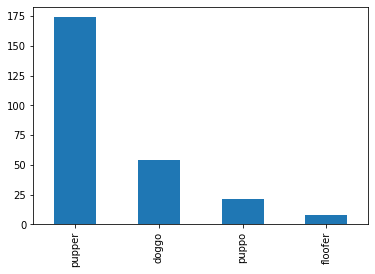

In [37]:
print(df[df['dog_type']!='None']['dog_type'].value_counts())
df[df['dog_type']!='None']['dog_type'].value_counts().head(10).plot.bar()
mplot.show()


In [38]:
df_puppers = df[df['dog_type']=="pupper"]
maximum_rated_number = df[df["rating_numerator"]==max(df["rating_numerator"])]["jpg_url"].size
puppers_rated_max =df_puppers[df_puppers["rating_numerator"]==max(df["rating_numerator"])]["jpg_url"].size
print("percentage of golden retreivers receiving maximum rating:{}%".format(int(puppers_rated_max*100/maximum_rated_number)))

print(df_puppers[df_puppers["rating_numerator"]==max(df["rating_numerator"])]["tweet_id"])

percentage of golden retreivers receiving maximum rating:16%
1905    881536004380872706
2045    822462944365645825
2054    854120357044912130
2133    807621403335917568
Name: tweet_id, dtype: int64


<a id='mostcommonspecies'></a>
### Most common dog species

In [39]:
df['species'].value_counts()

golden_retriever        147
Labrador_retriever      102
Pembroke                 95
Chihuahua                90
pug                      61
                       ... 
clumber                   1
Bouvier_des_Flandres      1
standard_schnauzer        1
Scotch_terrier            1
EntleBucher               1
Name: species, Length: 113, dtype: int64

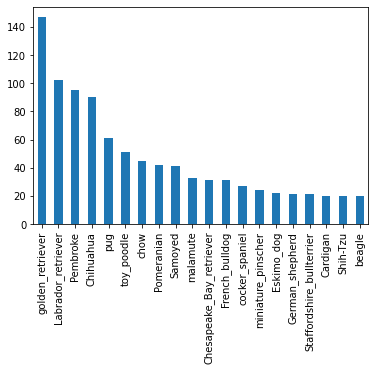

In [40]:
df['species'].value_counts().head(20).plot.bar()

mplot.show()

In [41]:
df_golden = df[df['species']=="golden_retriever"]
maximum_rated_number = df[df["rating_numerator"]==max(df["rating_numerator"])]["jpg_url"].size
goldens_rated_max =df_golden[df_golden["rating_numerator"]==max(df["rating_numerator"])]["jpg_url"].size
print("percentage of golden retreivers receiving maximum rating:{}%".format(int(goldens_rated_max*100/maximum_rated_number)))

print(df_golden[df_golden["rating_numerator"]==max(df["rating_numerator"])]["jpg_url"])

percentage of golden retreivers receiving maximum rating:12%
1375    https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg
1634    https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg
2133    https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg
Name: jpg_url, dtype: object


<a id='trends'></a>
### Trends

<a id='rvr'></a>
##### Rating vs retweets



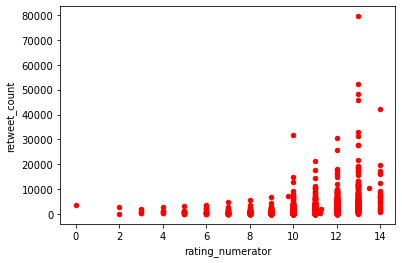

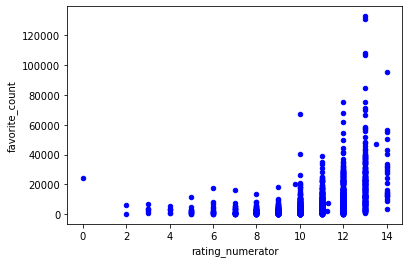

In [42]:
df.plot(kind='scatter',x='rating_numerator',y='retweet_count',color='red')
mplot.show()
df.plot(kind='scatter',x='rating_numerator',y='favorite_count',color='blue')
mplot.show()

<a id='averages'></a>
##### Highest and lowest average rating

In [43]:
df.groupby('species').mean()['rating_numerator'].sort_values()

species
Japanese_spaniel                5.000000
Afghan_hound                    8.000000
soft-coated_wheaten_terrier     8.538462
Walker_hound                    9.000000
Scotch_terrier                  9.000000
                                 ...    
standard_schnauzer             12.000000
Border_terrier                 12.142857
briard                         12.333333
Saluki                         12.500000
Bouvier_des_Flandres           13.000000
Name: rating_numerator, Length: 113, dtype: float64

In [44]:
jap_rating =int(df[df['species'] =='Japanese_spaniel']['tweet_id'].count())
bou_rating =int(df[df['species'] =='Bouvier_des_Flandres']['tweet_id'].count())
print("Japanese spaniel is rated {} times while Bouvier_des_Flandres is rated {} times".format(jap_rating,bou_rating))

Japanese spaniel is rated 1 times while Bouvier_des_Flandres is rated 1 times


In [45]:
print(df[df['species'] =='Japanese_spaniel']['jpg_url'])
print(df[df['species'] =='Bouvier_des_Flandres']['tweet_id'])

919    https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg
Name: jpg_url, dtype: object
1509    861288531465048066
Name: tweet_id, dtype: int64


<a id='leaderboard'></a>
##### Highest and lowest rating in the collected data

In [46]:
minimum_rating = df[df["rating_numerator"]==min(df["rating_numerator"])]["rating_numerator"].iloc[0]
minimum_rated_list=list(df[df["rating_numerator"]==min(df["rating_numerator"])]["jpg_url"])
print("minimum rating is {} \nlist of tweets that received minimum rating : {}".format(minimum_rating, minimum_rated_list))

minimum rating is 0.0 
list of tweets that received minimum rating : ['https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg']


In [47]:
maximum_rating = df[df["rating_numerator"]==max(df["rating_numerator"])]["rating_numerator"].iloc[0]
maximum_rated_list=list(df[df["rating_numerator"]==max(df["rating_numerator"])]["jpg_url"])
print("minimum rating is {} \nlist of tweets that received minimum rating : {}".format(maximum_rating, maximum_rated_list))

minimum rating is 14.0 
list of tweets that received minimum rating : ['https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg', 'https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg', 'https://pbs.twimg.com/media/Cr7q1VxWIAA5Nm7.jpg', 'https://pbs.twimg.com/media/Cs12ICuWAAECNRy.jpg', 'https://pbs.twimg.com/media/C61lFFiWoAAJdiL.jpg', 'https://pbs.twimg.com/media/C2JXyARUAAE4gbL.jpg', 'https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg', 'https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg', 'https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg', 'https://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg', 'https://pbs.twimg.com/media/C-L-aIYXgAIR0jY.jpg', 'https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg', 'https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg', 'https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg', 'https://pbs.twimg.com/ext_tw_video_thumb/832273373149413377/pu/img/qOqxM0b48fEarmq6.jpg', 'https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg', 'https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg', 'https://pbs.twimg.com

there are 1 dog(s) that received minimum rating


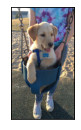

In [48]:
print("there are {} dog(s) that received minimum rating".format(len(minimum_rated_list)))
fig=mplot.figure(figsize=(12, 12))
rows = 5
columns = int(len(minimum_rated_list)/rows)+1
for i in range(1, len(minimum_rated_list)+1):
    url = minimum_rated_list[i-1]
    response = requests.get(url).content
    img = mplot.imread(io.BytesIO(response), format='JPG')
    fig.add_subplot(rows, columns, i)
    subplot= mplot.imshow(img)
    subplot.set_cmap('hot')
    subplot.axes.get_xaxis().set_visible(False)
    subplot.axes.get_yaxis().set_visible(False)
mplot.show()

there are 24 dog(s) that received maximum rating


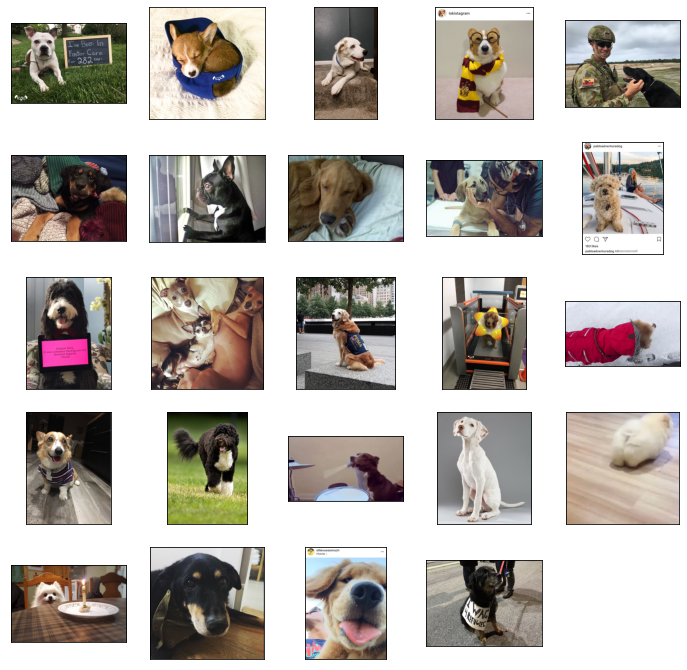

In [49]:
print("there are {} dog(s) that received maximum rating".format(len(maximum_rated_list)))
fig=mplot.figure(figsize=(12, 12))
rows = 5
columns = int(len(maximum_rated_list)/rows)+1
for i in range(1, len(maximum_rated_list)+1):
    url = maximum_rated_list[i-1]
    response = requests.get(url).content
    img = mplot.imread(io.BytesIO(response), format='JPG')
    fig.add_subplot(rows, columns, i)
    subplot= mplot.imshow(img)
    subplot.set_cmap('hot')
    subplot.axes.get_xaxis().set_visible(False)
    subplot.axes.get_yaxis().set_visible(False)
mplot.show()